<a href="https://colab.research.google.com/github/jproctor-rebecca/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')


In [3]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)


In [4]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]
        

In [5]:
# load and clean data
# load the data into clearly labled data frame
apartments = df

# print the shape of the DataFrame - prior to dropping NaNs
print('Shape of the dataset (before repmoving NaNs): ', apartments.shape)

# drop NaNs
apartments.dropna(inplace=True)

# print the shape if the DataFrram - post dropping NaNs
print('Shape of the dataset (after repmoving NaNs): ', apartments.shape)

# display the first five rows
apartments.head()


Shape of the dataset (before repmoving NaNs):  (48818, 34)
Shape of the dataset (after repmoving NaNs):  (47261, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


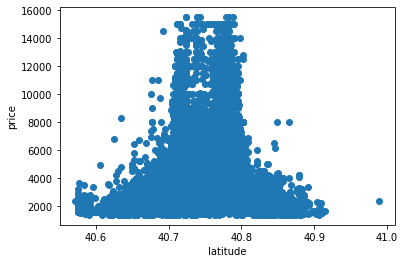

In [6]:
# exploring features
plt.scatter(apartments['latitude'], apartments['price'])
plt.xlabel('latitude')
plt.ylabel('price')

plt.show()

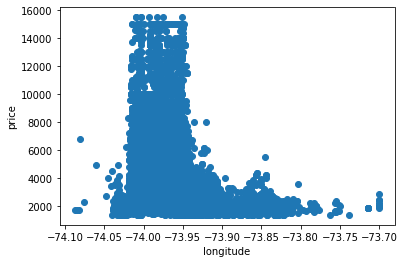

In [7]:
# exploring features
plt.scatter(apartments['longitude'], apartments['price'])
plt.xlabel('longitude')
plt.ylabel('price')

plt.show()

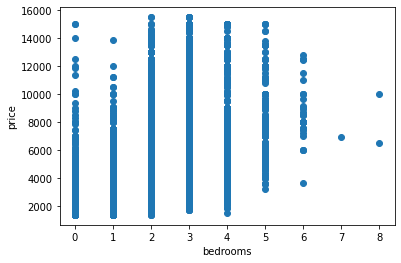

In [8]:
# exploring features
plt.scatter(apartments['bedrooms'], apartments['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.show()

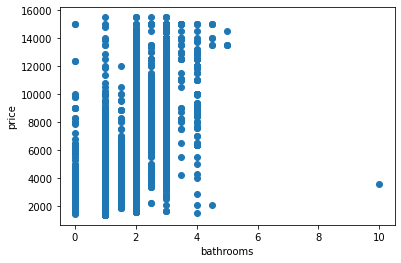

In [9]:
# exploring features
plt.scatter(apartments['bathrooms'], apartments['price'])
plt.xlabel('bathrooms')
plt.ylabel('price')

plt.show()

### Feature 1

In [10]:
# create features and target(s) from the data
# create the feature matrix
x_apartments = apartments['latitude']
print('The shape of the feature matrix: ', x_apartments.shape)

# create the target array
y_apartments = apartments['price']
print('The shape of the target array: ', y_apartments.shape)


The shape of the feature matrix:  (47261,)
The shape of the target array:  (47261,)


In [11]:
# import the model and instantiate the class
# import the predictor class
from sklearn.linear_model import LinearRegression

# instantiate the class (with default parameters)
model = LinearRegression()

# display the model parameters
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# arrange the data in 2D array
# display the shape of x_apartments
print('Original features matrix: ', x_apartments.shape)

# add a new axis to create a column vector
x_apartments_2D = x_apartments[:, np.newaxis]
print(x_apartments_2D.shape)


Original features matrix:  (47261,)
(47261, 1)


In [13]:
# fit the model
model.fit(x_apartments_2D, y_apartments)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# apply the model; use the model to predict new values
# look at coefficients 
# slope(also called the model coefficient)
print(model.coef_)

# intercept
print(model.intercept_)

# in equation form
print(f'\nprice = {model.coef_[0]} x latitude + ({model.intercept_})')


[-1656.36515324]
71076.0314878898

price = -1656.3651532424592 x latitude + (71076.0314878898)


In [15]:
# generate the line of linear regression from the model coefficients
# coerce x values into [n_observations, n_features] matrix
x_line = np.linspace(apartments['latitude'].min(), apartments['latitude'].max())   # x value is # lower capturing coeff & 
                                                                                   # y value is # higher capturing coeff
y_line = model.coef_*x_line + model.intercept_


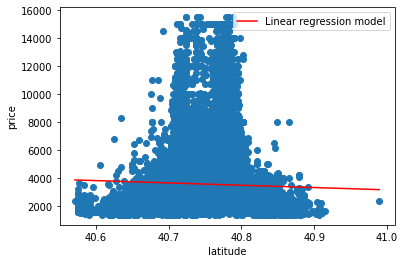

In [16]:
# create the figure 
plt.scatter(apartments['latitude'], apartments['price'])
plt.plot(x_line, y_line, color='red', label='Linear regression model')
plt.xlabel('latitude')
plt.ylabel('price')
plt.legend()

#plt.savefig('apartments_reg_sklearn.png', transparent=False, dpi=150)
plt.show()


### Feature 2

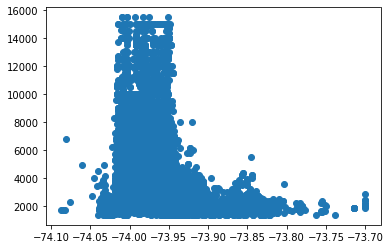

In [17]:
x = apartments['longitude']
y = apartments['price']

plt.scatter(x, y)

plt.show()


In [18]:
# choose a class of mode 
from sklearn.linear_model import LinearRegression


In [19]:
# choose model hyperparameters for validation
model = LinearRegression(fit_intercept=True)
model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# arrange data into feature matrix and target vector
X = x[:, np.newaxis]
X.shape


(47261, 1)

In [21]:
# fit model to data
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# view model coefficient - beta_0
model.coef_


array([-15232.4251522])

In [23]:
# view model intercept - beta_1
model.intercept_

-1123206.115110063

In [24]:
# fit to model
# coerce x values into [n_observations, n_features matrix]
x_line = np.linspace(apartments['longitude'].min(), apartments['longitude'].max())   # x value is # lower capturing coeff & 
                                                                                   # y value is # higher capturing coeff
#predict lables for unknown data
Xfit = x_line[:, np.newaxis]
yfit = model.predict(Xfit)


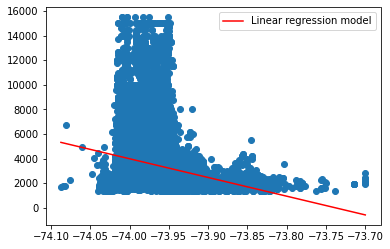

In [25]:
# map raw data
plt.scatter(x, y)

# map model fit
plt.plot(Xfit, yfit, color='red', label='Linear regression model')

plt.legend()
plt.show()


Conclusion: latitude and logitude must be used together as features in a cross_validation to achieve comprehensive results in a linear regression model

### Stretch Goal 1

### Cross Validation using Features 1 and 2

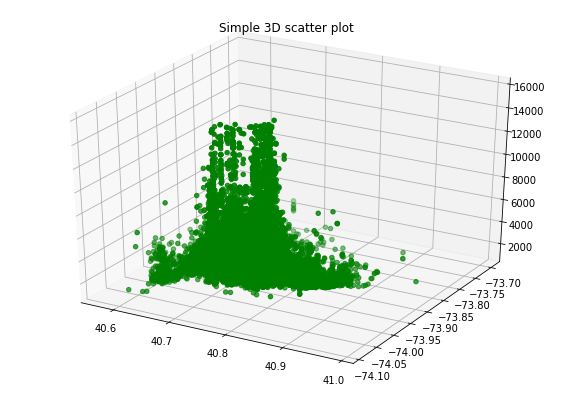

In [26]:
# Import libraries 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 

# create datasets
x = apartments['latitude']
y = apartments['longitude']
z = apartments['price']

# Creating figure 
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 

# Creating plot 
ax.scatter3D(x, y, z, color = "green") 
plt.title("Simple 3D scatter plot") 

plt.show()

In [27]:
# create baseline MAE
from sklearn.metrics import mean_absolute_error

y_pred = [y.mean()] * len(y)
print('Baseline MAE: ', mean_absolute_error(y, y_pred))

Baseline MAE:  0.021479869539826352


In [28]:
print(x.dtype)
print(y.dtype)
print(z.dtype)

float64
float64
int64


In [29]:
# reassign values x, y, z
features = ['latitude', 'longitude']                                           
X = apartments[features]      # represents both latitude and longitude as quantifiable
                              # measure in a 2D array
     
print(X.shape)

target = 'price' 
y = apartments[target]  # represents price as dependent measure of both latitude
                        # and logitude in Series
print(y.shape)

(47261, 2)
(47261,)


In [30]:
# load and arrange data
from sklearn.model_selection import train_test_split
train, test = train_test_split(apartments, train_size=0.80, random_state=1)  # split 80/20


In [31]:
# assign X/Y test train values
X_train = train[features]
Y_train = train[target]
x_true = test[features]
y_true = test[features]


In [32]:
from sklearn.naive_bayes import GaussianNB      # choose model class
model = GaussianNB()                             # instantiate model
model.fit(X_train, Y_train)                       # fit model to data
y_pred = model.predict(y_true)                  # predict on new data


In [33]:
# check matrix predicted labels (continuous) to true values
#from sklearn.metrics import accuracy_score  # need mean_absolute_error
#accuracy_score(y_true, y_pred)  # used for for categorical data
from sklearn.metrics import mean_absolute_error

y_pred = [y_true.mean()] * len(y_true)
print('Baseline MAE: ', mean_absolute_error(y_true, y_pred))


Baseline MAE:  0.025397645903525057


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


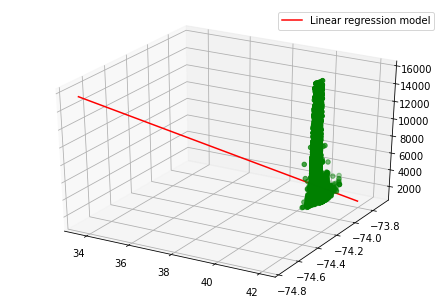

In [38]:
# Import libraries 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
from statistics import mean

# create datasets
x = apartments['latitude']
y = apartments['longitude']
z = apartments['price']

# Creating figure 
#fig = plt.figure(figsize = (10, 7)) 
#ax = plt.axes(projection ="3d") 

# Creating plot 
#ax.scatter3D(x, y, z, color = "green") 
#plt.title("Simple 3D scatter plot") 

# create zfit  for mapping
xyz = np.concatenate((x[:, np.newaxis], 
                      y[:, np.newaxis], 
                      z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
#xyz += np.random.normal(size=xyz.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
#datamean = xyz.mean(axis=0)

# Do an SVD on the mean-centered data.
#uu, dd, vv = np.linalg.svd(xyz - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
#linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
#linepts += datamean

# Verify that everything looks right.

#import matplotlib.pyplot as plt
#import mpl_toolkits.mplot3d as m3d

#ax = m3d.Axes3D(plt.figure())
#ax.scatter3D(*data.T)
#ax.plot3D(*linepts.T)
#plt.show()

# Create regression line
#plt.plot(X_train, y_pred, z_fit, color='red', label='Linear regression model')

#plt.show()

# this will find the slope and x-intercept of a plane
# parallel to the y-axis that best fits the data
A_xz = np.vstack((x, np.ones(len(x)))).T
m_xz, c_xz = np.linalg.lstsq(A_xz, z)[0]

# again for a plane parallel to the x-axis
A_yz = np.vstack((y, np.ones(len(y)))).T
m_yz, c_yz = np.linalg.lstsq(A_yz, z)[0]

# the intersection of those two planes and
# the function for the line would be:
# z = m_yz * y + c_yz
# z = m_xz * x + c_xz
# or:
def lin(z):
    x = (z - c_xz)/m_xz
    y = (z - c_yz)/m_yz
    return x,y

#verifying:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# create figure
fig = plt.figure()
ax = Axes3D(fig)

zz = np.linspace(apartments['price'].min(), apartments['price'].max())
xx,yy = lin(zz)

# create plot
ax.scatter(x, y, z, color='green')
ax.plot(xx, yy, zz, color='red', label='Linear regression model')

plt.savefig('test.png')
plt.legend()
plt.show()

### Stretch Goal 2


Discovery of Statistical Regression

Carl Frederich Gauss first discovered and documented statistical regression but considered the discovery so intuitive and obvious that he did not publicly state his findings until many years later when a peer, Adrien-Marie Legendre, published his discovery of the method.  After a very public and legal dispute, Gauss was eventually credited as the founder of regression.  

Regression allows us to use statistics to explore relationships between variables and even predict future behavoir of those interactions.  

The foundational mathematical function
behind Gauss's and Legendre's regression analysis is the least squares method.  This method was so effective at the time because it minimizes least squared error (which is important because least squares method was heavily used by the mathematic and scientific communities at the time), it was easy to calculate, and least squares distributes normally (which makes checking your calculations easy).

Regression is still evolving in application as computer technology allows computation power to grow the analysis power of the tool.

### Stretch Goal 3


2.1 What Is Statistical Learning?

The input variables are typically denoted using the variable
output
variable
symbol X, with a subscript to distinguish them.
The inputs
go by different names, such as predictors, independent variables, features,
predictor
independent
variable
feature
or sometimes just variables. The output variable
often called the response or dependent variable, and is typically denoted using the symbol Y

MAE is a random
error term, which is independent of X and has mean zero. In this formula- error term
tion, f represents the systematic information that X provides about Y .

the function f that connects the input variable to the
output variable is in general unknown
In general, the function f may involve more than one input variable.
Here f is a two-dimensional surface that must be estimated
based on the observed data.
***In essence, statistical learning refers to a set of approaches for estimating
f.***

